In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [316]:
#load data
pokemon_data = pd.read_csv("/Users/JosephVele/Downloads/Pokemon.csv")

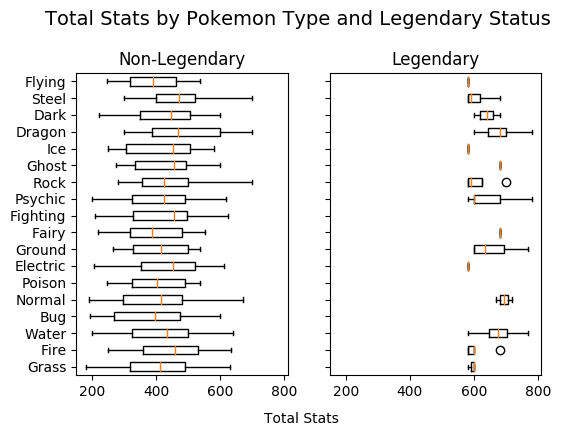

In [317]:
#Obtain unique categorical attributes for Types 1
Types = pokemon_data['Type 1'].unique()

#Create Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
fig.dpi =100

#Initialize empty pokemon_datasets to be used for boxplot
legendary = []
nonlegendary= []

#Generate pokemon_datasets by Type and Legendary Status
for i in range(len(Types)):
    legendary.append(pokemon_data[(pokemon_data['Legendary']==True) & (pokemon_data['Type 1']== Types[i]) ]['Total'])
    nonlegendary.append(pokemon_data[(pokemon_data['Legendary']==False) & (pokemon_data['Type 1']== Types[i]) ]['Total'])

#Generate Boxplots
ax1.boxplot(nonlegendary, vert=False)
ax1.set_title('Non-Legendary')
ax2.boxplot(legendary, vert=False)
ax2.set_title('Legendary')
plt.yticks(list(range(1,19)),Types)
fig.text(0.5, 0.005, 'Total Stats', ha='center')
fig.text(0.5, 1,'Total Stats by Pokemon Type and Legendary Status ',ha='center', fontsize=14)
plt.show()


In the above plot I decided not to encode the categorical attribute ,Legendary,  as color since it did not make sense. It would be impossible to distinguish the box plots. Also, I decided to encode the categorical attribute, Type 1, on the vertical spatial position rather than the horizontal spatial position because the axis would be cluttered. The box marks are used to encode the interquantile range, the circle marks are to encode outliers, and the yellow line encodes the mean . I believe by using these encodings through the box plot, alot of information is captured in a simple visualization. Per Chapter 13 and Visualization Zoo, boxplots produce an aggregate statistical summary and are perfect for exploratory data analysis. Given, the task of the visualization is to discover, I believe this visualization is preferable to the bar chart below. Overall, it contains more information and gives you more insight into the data.


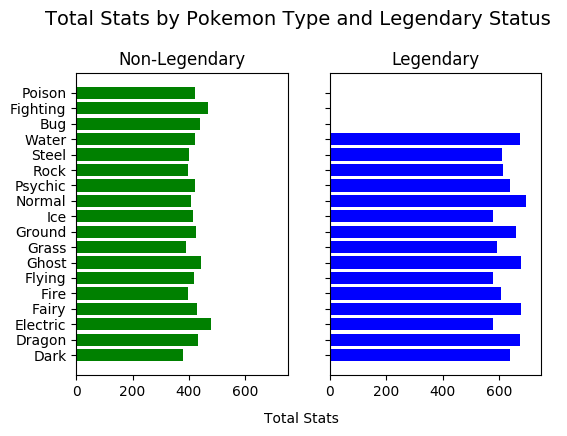

In [318]:
#Calculate overall mean by Legendary Status and Type 1
pokemon_grouped = pokemon_data.groupby(['Legendary','Type 1'])['Total'].mean().reset_index()

#Generate figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True )
fig.dpi= 100

#Create Non Legendary Bar Plot
ax1.barh(pokemon_grouped[pokemon_grouped['Legendary']==False]['Type 1'],pokemon_grouped[pokemon_grouped['Legendary']==False]['Total'], 
         color= 'g')
ax1.set_xlim((0, 750))
ax1.set_title('Non-Legendary')

#Create Legendary Bar Plot
ax2.barh(pokemon_grouped[pokemon_grouped['Legendary']==True]['Type 1'],pokemon_grouped[pokemon_grouped['Legendary']==True]['Total'], 
         color='b')
ax2.set_xlim((0, 750))
ax2.set_title('Legendary')

#Fix Y axis - caused because there are no Legenadary Bug, Fighting, or Poison Pokemon
plt.yticks(list(pokemon_grouped[pokemon_grouped['Legendary']==True]['Type 1'])+['Bug','Fighting','Poison'])

#Create Overall Title
fig.text(0.5, 0.005, 'Total Stats', ha='center')
fig.text(0.5, 1,'Total Stats by Pokemon Type and Legendary Status ',ha='center', fontsize=14)
plt.show()


In the above plot, I decided to encode the Total quantitative attribute as a line mark rather than a point mark because the point marks really did not aid in comparing a quantitative attribute with two categorical attributes. Per the book in Chapter 7(page 146), "scatterplots are the canonical example of showing two value attributes. An idiom could show one key and one value attribute; bar charts are the best-known example." Again, the categorical attribute was shown on the vertical spatial position rather the horizontal spatial position because of the text clutter that would occur. Also to avoid, clutter I shared the y axis for both datsets to juxtapose the information. I believe by using the same x scale and the length channel for the mean(Total) stats, it introduces a pop out factor, illustrating that the Legendary Pokemon clearly have higher Total stats on average. The limitations of this chart is that it only encompasses the mean and does not provide more insight. The image would be better for the task of presenting order to give a simple summary. 